In [1]:
# imports and so on
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Setup Complete")

Setup Complete


# Looking at randomly picked dataset

### First, load the data

In [2]:
file_path='../input/suicide-rates-overview-1985-to-2016/master.csv'

my_data = pd.read_csv(file_path)

### Then, look over it

In [3]:
my_data.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
my_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Check some details about it

In [6]:
countries = my_data.groupby('country').country.unique()
print("There are", countries.count(), "countries")

years_list = sorted(my_data.year.unique())
years = len(years_list)
print("There are", years, "years in the dataset:", years_list)

There are 101 countries
There are 32 years in the dataset: [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


### Drop redundant data

In [7]:
my_data_trimmed = my_data.drop(['suicides/100k pop', 'country-year'], axis=1)

### Clean it up a bit

In [8]:
my_data_trimmed.columns = my_data_trimmed.columns.str.strip()
my_data_trimmed['gdp_for_year ($)'] = my_data_trimmed['gdp_for_year ($)'].str.replace(',','').astype('int64')
my_data_trimmed.head()

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,NaN,2156624900,796,Boomers


### A trend chart

Just a simple line plot, nothing fancy. Since there are many countries in the file, just focus on some of them.

First, group the data by country and year, summing values.
It's too detailed in the original data set for the trend charting purpose, I want to compare countries by suicides no matter of sex and age .

In [9]:
colNames = ['suicides_no', 'population']
countriesData = my_data_trimmed.groupby(['country', 'year'])[colNames].sum()

print(countriesData.head())

              suicides_no  population
country year                         
Albania 1987           73     2709600
        1988           63     2764300
        1989           68     2803100
        1992           47     2822500
        1993           73     2807300


### Compute the suicide number/100000 for each country 

In [10]:
fieldToChart = 'suicides_avg' 
countriesData[fieldToChart] = countriesData.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)
countriesData = countriesData.drop(colNames, axis=1)

print(countriesData.head(10))

              suicides_avg
country year              
Albania 1987      2.694125
        1988      2.279058
        1989      2.425886
        1992      1.665190
        1993      2.600363
        1994      1.754817
        1995      3.030929
        1996      3.027005
        1997      5.709871
        1998      5.111694


### The same for the 'whole world' (not all countries are present)

In [11]:
worldData = my_data_trimmed.groupby('year')[colNames].sum()

print(worldData.head())

worldData[fieldToChart] = worldData.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)
worldData.drop(colNames, axis=1, inplace=True)

print(worldData.head())


      suicides_no  population
year                         
1985       116063  1008600086
1986       120670  1029909613
1987       126842  1095029726
1988       121026  1054094424
1989       160244  1225514347
      suicides_avg
year              
1985     11.507336
1986     11.716562
1987     11.583430
1988     11.481514
1989     13.075653


### Now chart some countries and the 'world' average

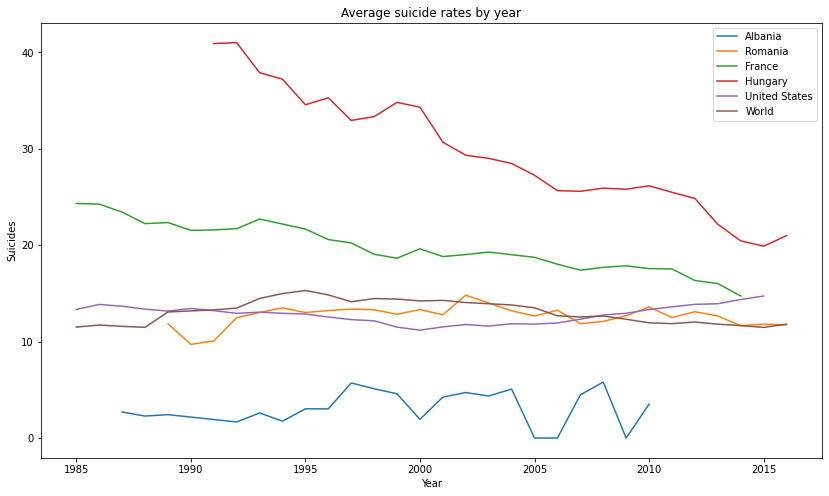

In [12]:
countries_to_chart = ['Albania', 'Romania', 'France', 'Hungary', 'United States']

plt.figure(figsize=(14,8))
plt.title('Average suicide rates by year')
plt.xlabel('Year')
plt.ylabel('Suicides')
for country in countries_to_chart:
    data = countriesData.loc[country]
    sns.lineplot(data=data[fieldToChart], label=country)
    
sns.lineplot(data=worldData[fieldToChart], label='World')

### Look at generations data

In [13]:
genData = my_data_trimmed.groupby('generation')[colNames].sum()

print(genData.head())

genData[fieldToChart] = genData.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)
genData.drop(colNames, axis=1, inplace=True)

print(genData.head())

                 suicides_no   population
generation                               
Boomers              2284498  13350511729
G.I. Generation       510009   2126202724
Generation X         1532804  13472109292
Generation Z           15906   2503541842
Millenials            623459  10649461202
                 suicides_avg
generation                   
Boomers             17.111689
G.I. Generation     23.986847
Generation X        11.377610
Generation Z         0.635340
Millenials           5.854371


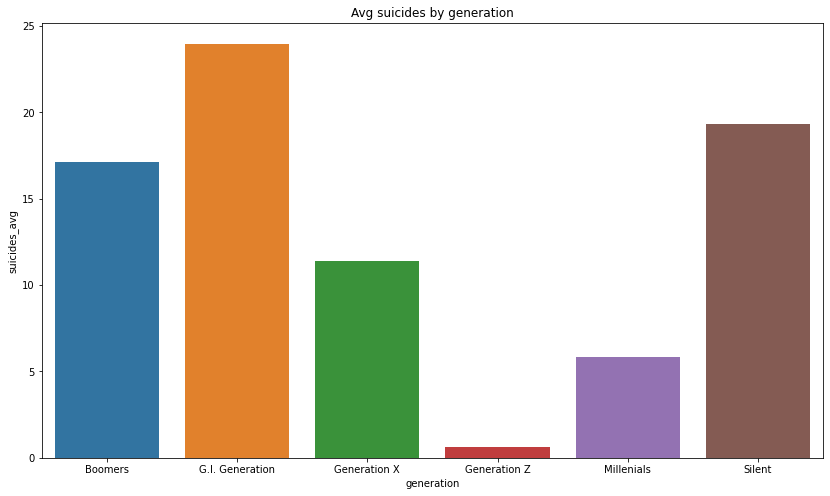

In [14]:
plt.figure(figsize=(14,8))
plt.title('Avg suicides by generation')
sns.barplot(x=genData.index, y=genData['suicides_avg'])

### Now let's look at detail, by sex

Don't mess with data, display it almost as it is, but recompute the suicide rates.
Color by sex.

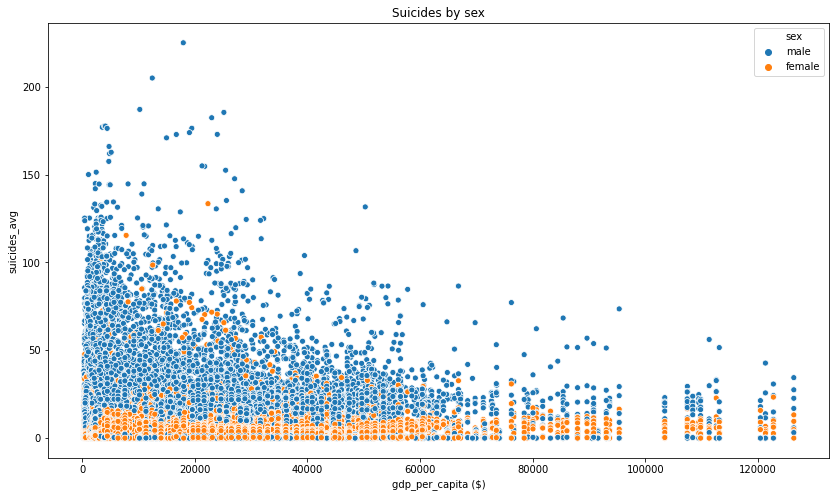

In [15]:
my_detailed_data = my_data_trimmed.copy()
my_detailed_data[fieldToChart] = my_detailed_data.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)


plt.figure(figsize=(14,8))
plt.title('Suicides by sex')
sns.scatterplot(x=my_detailed_data['gdp_per_capita ($)'], y=my_detailed_data[fieldToChart], hue=my_detailed_data['sex'])

#sns.lmplot(x='gdp_per_capita ($)', y=fieldToChart, hue='sex', data=my_detailed_data, aspect=1.5, height=8)

In [16]:
worldData = my_data_trimmed.groupby('sex')[colNames].sum()
worldData[fieldToChart] = worldData.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)
worldData.drop(colNames, axis=1, inplace=True)

worldData

,suicides_avg
sex,
female,5.935839
male,20.714727


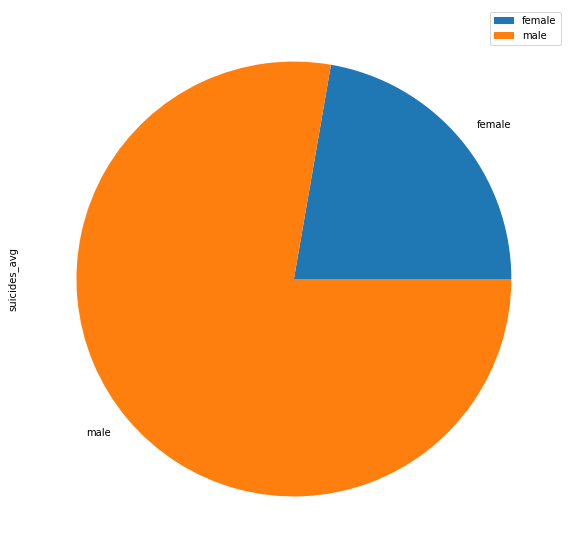

In [17]:
worldData.plot.pie(y='suicides_avg', figsize=(10,10))

How similar is for countries?

In [18]:
# remove records for countries that we're not interested in
countriesData = my_data_trimmed[my_data_trimmed['country'].isin(countries_to_chart)] 

sexData = countriesData.groupby(['country','sex'])[colNames].sum()

print(sexData.head())

sexData[fieldToChart] = sexData.apply(lambda x: x['suicides_no']/x['population'] * 100000, axis =  1)
sexData.drop(colNames, axis=1, inplace=True)

print(sexData.head())

                suicides_no  population
country sex                            
Albania female          693    31301599
        male           1277    31023868
France  female        89419   861778921
        male         239708   808977854
Hungary female        18115   130709284
                suicides_avg
country sex                 
Albania female      2.213944
        male        4.116186
France  female     10.376095
        male       29.630972
Hungary female     13.859000


In [19]:
sexData = sexData.reset_index()

#switchToNumerical = { 'sex' : { 'male' : 0 , 'female' : 1 }}
#sexData.replace(switchToNumerical, inplace=True)

sexData.head()

,country,sex,suicides_avg
0,Albania,female,2.213944
1,Albania,male,4.116186
2,France,female,10.376095
3,France,male,29.630972
4,Hungary,female,13.859000


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c95889978>,
      dtype=object)

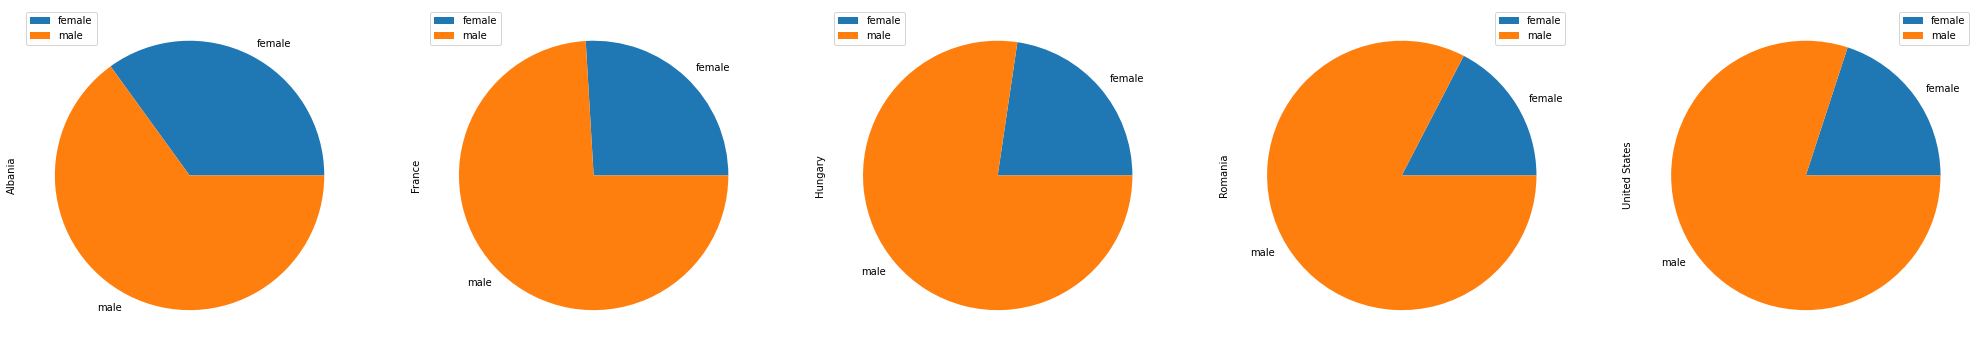

In [20]:
def pie(vals, lab, color=None):
    plt.pie(vals, labels=lab.values)
    
#grid = sns.FacetGrid(sexData, col='country')
#grid.map(pie, 'suicides_avg', 'sex')

#plt.show()

sexData.pivot('sex', 'country', 'suicides_avg').plot.pie(subplots=True, figsize=(35, 15))

### Let's look at correlations

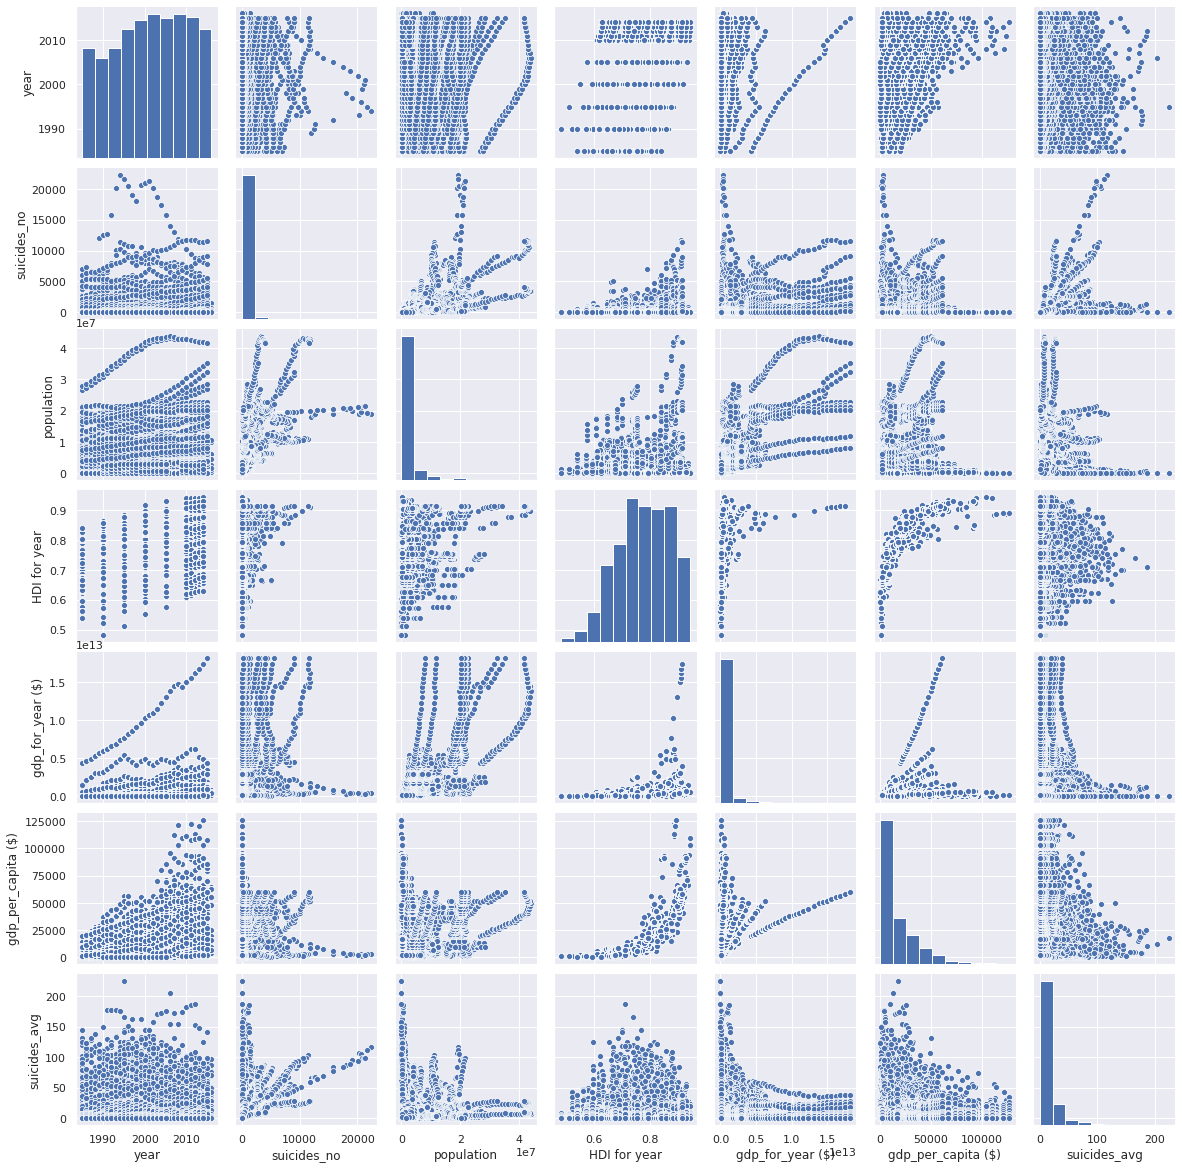

In [21]:
sns.set()
sns.pairplot(my_detailed_data, height = 2.3)
plt.show();

In [22]:
correlations = my_detailed_data.corr()

correlations

,year,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),suicides_avg
year,1.000000,-0.004546,0.008850,0.366786,0.094529,0.339134,-0.039038
suicides_no,-0.004546,1.000000,0.616162,0.151399,0.430096,0.061330,0.306603
population,0.008850,0.616162,1.000000,0.102943,0.710697,0.081510,0.008283
HDI for year,0.366786,0.151399,0.102943,1.000000,0.305193,0.771228,0.074275
gdp_for_year ($),0.094529,0.430096,0.710697,0.305193,1.000000,0.303405,0.025238
gdp_per_capita ($),0.339134,0.061330,0.081510,0.771228,0.303405,1.000000,0.001783
suicides_avg,-0.039038,0.306603,0.008283,0.074275,0.025238,0.001783,1.000000


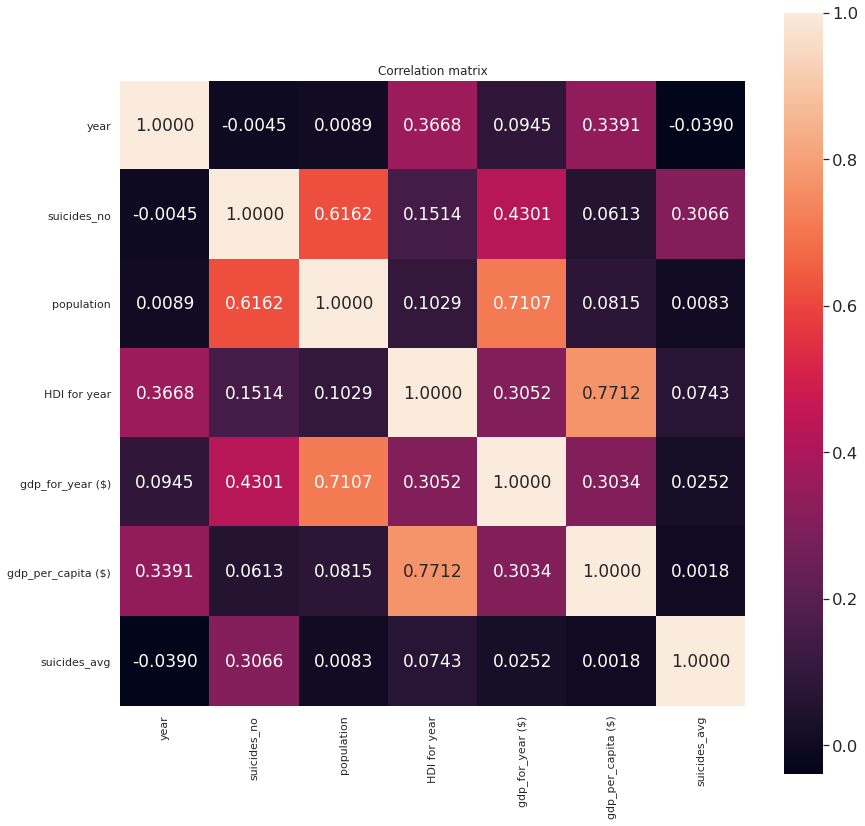

In [23]:
plt.figure(figsize=(14,14))
plt.title('Correlation matrix')
sns.set(font_scale=1.5)
hm = sns.heatmap(correlations, cbar=True, annot=True, square=True, fmt='.4f', annot_kws={'size': 17}, yticklabels=correlations.columns.values, xticklabels=correlations.columns.values)
plt.show()